<a href="https://colab.research.google.com/github/crisouzajr/Statistics/blob/Z-test/Z_Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística Preditiva - Teste de Hipótese (Z Teste)

**Teste Z** é qualquer teste estatístico no qual a distribuição do teste estatístico sob a hipótese nula pode ser aproximada por uma distribuição normal. 

É um teste estatístico usado para inferência (afirma a verdade de uma preposição em decorrência de sua ligação com outras já reconhecidas como verdadeiras), capaz de determinar se a diferença entre a média da amostra e da população é grande o suficiente para ser significativa estatisticamente.

* Esse teste é utilizado para amostras grande (> ou = 30).
* Usa – se quando o desvio padrão é conhecido.
* Tem um único valor crítico, sendo mais conveniente que o Teste T de Student,
que tem valores críticos separados para cada tamanho de amostra.



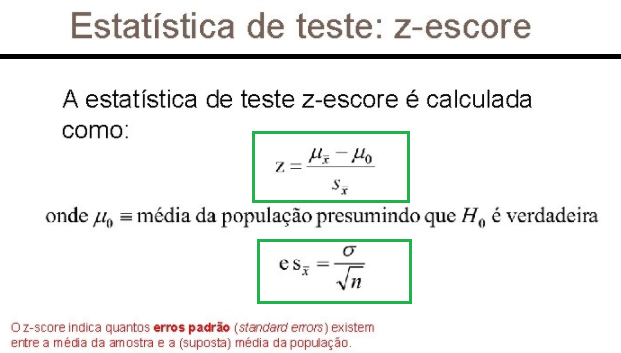

## Exemplo Prático

Utilizado a base de dados referente a pressão sanguínea coletada de pascientes antes e depois da administração de determinada medicação, será possível verificar se existe alguma diferença significante, primeiramente de uma média conhecida, e posteriormente qual a relação de variância das médias antes e depois do tratamento.


* Nesse exemplo iremos analisar o comportamento da variável pressão sanguínea de pascientes ANTES e DEPOIS de serem submetidos a um determinado tipo de tratamento, onde:

H0: diferença entre as duas amostras é 0.

H1: diferença entre as duas amostras não é 0.

## Z Test para UM ÚNICO grupo de amostra.

* Iremos verificar se aceitamos ou não a média de 156, para pressão para o grupo e pascinetes antes da administração da medicação.

H0: Média do grupo = 156

H1: Média do grupo =! 156

In [1]:
# C arregando as bibliotecas necessárias ao estudo

import pandas as pd
from scipy import stats
from statsmodels.stats import weightstats as stests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Carregando a base de dados com e criando um dataset com as colunas de interesse.

df = pd.read_csv("blood_pressure.csv", delimiter=';')
df = df.drop(columns= {'patient','sex','agegrp'})
df

,bp_before,bp_after
0,143,153
1,163,170
2,153,168
3,153,142
4,146,141
...,...,...
115,152,152
116,161,152
117,165,174
118,149,151


In [3]:
"""Fazendo a chamada do Z TESTE através da biblioteca; definindo o valor da 
suposta média de pressões sanguíneas (value=156);calculando o pvalues 
(probabilidade calculada, ou seja, a probabilidade de se encontrar a observação)."""

ztest , pval = stests.ztest(df['bp_before'], x2=None, value=156)
print('p-values = ',pval)

p-values =  0.6651614730255063


In [4]:
# Inferência e determinação do resultado para o Z TESTE.

if pval < 0.05:
    print("Rejeitamos a Hipótese nula.")
else:
    print("Aceitamos a Hipótese nula.")

Aceitamos a Hipótese nula.


## TESTE PARA AMOSTRA PAREADAS

* Nesse exemplo iremos analisar o comportamento da variável pressão sanguínea de pascientes ANTES e DEPOIS de serem submetidos a um determinado tipo de tratamento, onde:

H0: diferença entre as duas amostras é 0.

H1: diferença entre as duas amostras não é 0.

In [5]:
# Carregando a base de dados

df

,bp_before,bp_after
0,143,153
1,163,170
2,153,168
3,153,142
4,146,141
...,...,...
115,152,152
116,161,152
117,165,174
118,149,151


In [6]:
""" Fazendo a chamada do Z TESTE; determinando x1 e x2 (grupos de amostras a serem inferidas);
value = 0, para determinar se a média ates é zero ou não; alternative é para verificar a diferença
da média x1 e x2. """

ztest ,pval1 = stests.ztest(df['bp_before'], x2=df['bp_after'], value=0, alternative='two-sided')
print(float(pval1))

0.002162306611369422


In [7]:
# Inferência e determinação do resultado para o Z TESTE.

if pval1<0.05:
    print("Rejeitamos a Hipótese nula")
else:
    print("Aceitamos a Hipótese nula")

Rejeitamos a Hipótese nula
